# Rotten Tomatoes movie review - Weekly Project

https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews

![](https://i.imgur.com/ZQeGJcW.png)
The Rotten Tomatoes movie review dataset is a corpus of movie reviews used for sentiment analysis

This competition presents a chance to benchmark your sentiment-analysis ideas on the Rotten Tomatoes dataset. You are asked to label phrases on a scale of five values: 
- negative
- somewhat negative
- neutral
- somewhat positive
- positive. 

Obstacles like sentence negation, sarcasm, terseness, language ambiguity, and many others make this task very challenging.

Workflow: 
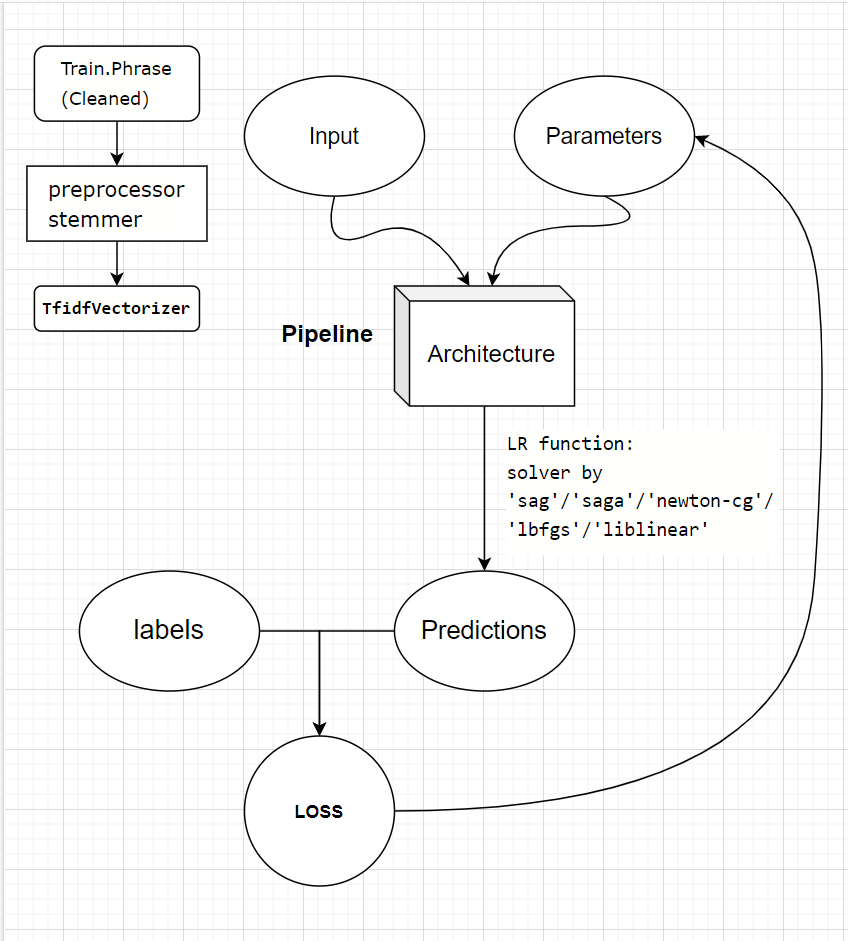

Import Library:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
# Mount data from google drive : 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
PATH = Path('/content/drive/My Drive/FTMLE | 2020.09 | Kermadec/Week 5/Weekly Project - Rotten Tomatoes/')

In [ ]:
# Load the data :
train = pd.read_csv(PATH/'train.csv')
test = pd.read_csv(PATH/'test.csv')

In [ ]:
train.head()

,Unnamed: 0,PhraseId,SentenceId,Phrase,Sentiment
0,0,122,4,positively,3
1,1,19366,851,disguise the slack complacency of -LRB- Godard...,1
2,2,54763,2726,realizes a fullness that does not negate the s...,3
3,3,89708,4667,sealed,2
4,4,33494,1571,Go Where We Went 8 Movies Ago,3


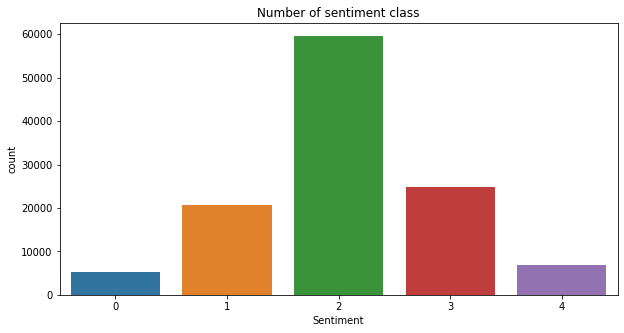

In [ ]:
## Show the number of class distributed
plt.figure(figsize=(10,5))
ax=plt.axes()
ax.set_title('Number of sentiment class')
sns.countplot(x=train.Sentiment,data=train);

# => this is unbalanced dataset

In [ ]:
train.Sentiment.mean()

2.0632320902217094

## CLEAN DATA :

1. Clear all the string that's doesnt make sense. (after test on trainning with emoticons )

In [ ]:
# using punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
#convert phrase!
train['Phrase1']=train.Phrase.apply(lambda x: x.translate(str.maketrans('','',string.punctuation)).lower())
test['Phrase1']=test.Phrase.apply(lambda x: x.translate(str.maketrans('','',string.punctuation)).lower())

In [ ]:
train.sample(5)



,Unnamed: 0,PhraseId,SentenceId,Phrase,Sentiment,Phrase1
50756,50756,149000,8107,", it misses a major opportunity to be truly re...",0,it misses a major opportunity to be truly rev...
97077,97077,60307,3045,"a movie , which normally is expected to have c...",1,a movie which normally is expected to have ch...
15149,15149,17132,743,melodrama and tiresome love triangles,1,melodrama and tiresome love triangles
6866,6866,133260,7189,most unexpected,2,most unexpected
94273,94273,27999,1285,convincing about The Quiet American,2,convincing about the quiet american


In [ ]:
from collections import Counter

vocab = Counter()
for stm in train.Phrase1:
    for word in stm.split(' '):
        vocab[word] += 1

vocab.most_common(20)

[('', 56785),
 ('the', 38068),
 ('a', 27094),
 ('of', 24201),
 ('and', 23806),
 ('to', 16749),
 ('s', 12652),
 ('in', 10296),
 ('is', 10015),
 ('that', 9188),
 ('it', 8713),
 ('as', 6508),
 ('with', 5854),
 ('for', 5551),
 ('its', 5312),
 ('film', 5004),
 ('an', 4874),
 ('movie', 4406),
 ('this', 4257),
 ('be', 3819)]

In [ ]:
#import stopwords
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(none_make_sense)

In [ ]:
vocab_reduced = Counter()
# Go through all of the items of vocab using vocab.items() and pick only words that are not in 'stop_words' 
# and save them in vocab_reduced
for w, c in vocab.items():
    if not (w in stop_words):
        vocab_reduced[w]=c
# for w, c in vocab.items():
#     if not (w in none_make_sense):
#         vocab_reduced[w]=c
         
vocab_reduced.most_common(20)

[('film', 5004),
 ('movie', 4406),
 ('nt', 2935),
 ('one', 2714),
 ('like', 2279),
 ('story', 1880),
 ('good', 1544),
 ('characters', 1411),
 ('much', 1368),
 ('time', 1313),
 ('comedy', 1306),
 ('little', 1182),
 ('even', 1170),
 ('funny', 1156),
 ('way', 1155),
 ('life', 1102),
 ('make', 1064),
 ('movies', 1026),
 ('love', 976),
 ('new', 936)]

In [ ]:
none_make_sense = ['','the','a','an''of','to','in','that','us','we','you', 'your','i','it','its','his','her','this','rrb','lrb'
                  ]
# lrb = Left Round Bracket " ( "
# rrb = Right Round Bracket " ) "

##### Remove special character

In [ ]:
import re 
def preprocessor(text):
    """ Return a cleaned version of text
    """
    #rEPLACE 
    text = re.sub('tn', 'not', text)
    text = re.sub('s', 'is', text)
    return text

In [ ]:
from nltk.stem import PorterStemmer

porter = PorterStemmer()

# Split a text into list of words
def tokenizer(text):
    return text.split()

# Split a text into list of words and apply stemming technique
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [ ]:
#another stem
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
stemmer2 = SnowballStemmer("english", ignore_stopwords=False)
def tokenizer(text):
    return text.split()
def tokenizer_stem(text):
    return [stemmer.stem(word) for word in text.split()]


##### Train Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split

import numpy as np

X = train['Phrase1']
y = train['Sentiment']
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=99)
#because the test rows is over 40k so i put more on the train set.

In [ ]:
#Prepare data for model:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer(tokenizer=tokenizer_porter , preprocessor=preprocessor,stop_words=stop_words, 
                        ngram_range=(1,2),norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False)

In [ ]:
#Train model:
clf = Pipeline([('vect', tfidf),
                ('clf', LogisticRegression(tol=0.001,random_state=91, solver = 'sag',C = 3.26
                                           ))]) #solver ='liblinear' does not work well ,class_weight={0:0.25,1:0.15,2:0.09,3:0.18, 4: 0.3}


                                           # Change C and tol to get fit
                                          

clf.fit(X_train, y_train)
#https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-defintions


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'inoto', "it'", 'onc', 'onli', 'ourselv', "she'", "should'v", 'themselv', 'thi', 'unotil', 'veri', 'wa', 'whi', "you'r", "you'v", 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=<function preprocessor at 0x7f9a7825d6a8>,
                                 smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', '...
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function tokenizer_porter at 0x7f9a782c5f28>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 LogisticRegression(C=3.26, class_weight=None, dual=False,
        

In [ ]:
clf.predict_proba(X_validation)

array([[0.00980222, 0.04719731, 0.82464782, 0.10146908, 0.01688357],
       [0.02218728, 0.07191611, 0.71747901, 0.17099593, 0.01742165],
       [0.01126546, 0.0459706 , 0.63915613, 0.25091156, 0.05269624],
       ...,
       [0.02164824, 0.52684736, 0.35005537, 0.07904511, 0.02240391],
       [0.02192395, 0.71374375, 0.19467395, 0.05113055, 0.0185278 ],
       [0.00641772, 0.04245731, 0.90203732, 0.04264234, 0.00644531]])

In [ ]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Now apply those above metrics to evaluate your model

predictions = clf.predict(X_validation)
print('accuracy:',accuracy_score(y_validation,predictions))
print('confusion matrix:\n',confusion_matrix(y_validation,predictions))
print('classification report:\n',classification_report(y_validation,predictions))

#accuracy: 0.6553035157418087 // tol=1e-4,random_state=42, solver ='newton-cg',C=5.54,max_iter=1000
#accuracy: 0.6530821478918365 // tol=1e-4,random_state=42, solver ='newton-cg',C=7.54,max_iter=1000
#accuracy: 0.6568413857917895 // tol=1e-4,random_state=42, solver ='newton-cg',C=4.54,max_iter=1000
#accuracy: 0.6573112905292836 //solver ='newton-cg',C=2.99
#accuracy: 0.657482164979281 //solver ='newton-cg',C=3.27
#accuracy: 0.6574821649792815 //solver ='newton-cg',C=3.55
#accuracy: 0.6601307189542484 // solver ='newton-cg',C=3.55 // norm='l2', use_idf=False, smooth_idf=True, sublinear_tf=False)
#accuracy: 0.655602546029305 // solver ='saga',C=6, tol = 0.01
#accuracy: 0.6553462343543082 // tol=0.001,random_state=11, C = 3.1632320902217094, solver = 'newton-cg'//tokenizer=tokenizer_stem, ngram_range=(1,2),norm='l2', use_idf=False, smooth_idf=True, sublinear_tf=False)
#accuracy: 0.6617247964619559 // tol=0.001,random_state=11, C = 3.4632320902217094, solver = 'newton-cg' // test_size = 0.17
#accuracy: 0.6744414541415695 // tol=0.001,random_state=21,C = 3.2232320902217094, solver = 'sag' // test_size = 0.2 //ngram_range=(1,2),norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False)
#accuracy: 0.6568133276377617 // tol=0.01, newton-cg
#accuracy: 0.6569841947885519 

accuracy: 0.6493229099918835
confusion matrix:
 [[  314   513   197    12     0]
 [  210  1820  1888   132     5]
 [   40   870 10051   950    34]
 [    3   115  1997  2562   342]
 [    0    14   171   716   453]]
classification report:
               precision    recall  f1-score   support

           0       0.55      0.30      0.39      1036
           1       0.55      0.45      0.49      4055
           2       0.70      0.84      0.77     11945
           3       0.59      0.51      0.55      5019
           4       0.54      0.33      0.41      1354

    accuracy                           0.65     23409
   macro avg       0.59      0.49      0.52     23409
weighted avg       0.63      0.65      0.63     23409



![](https://i.stack.imgur.com/K568D.png)



Text(0.5, 87.0, 'Predicted label')

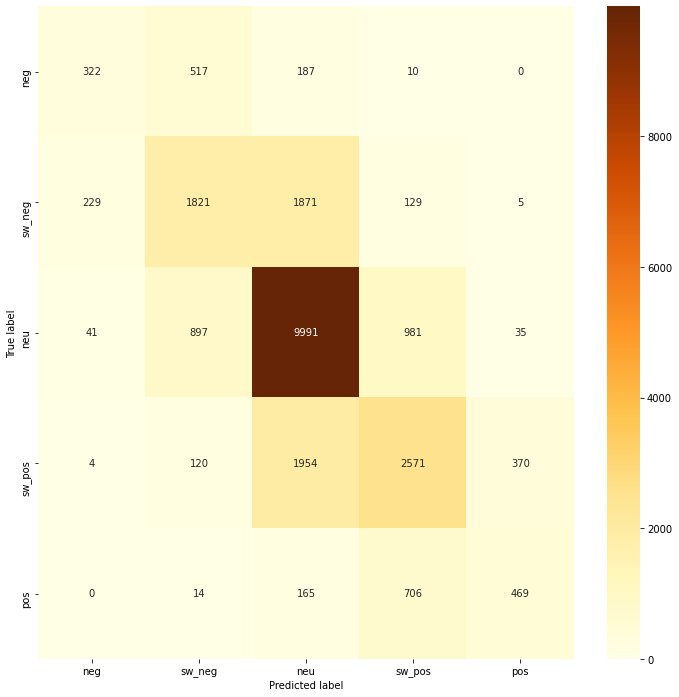

In [ ]:
import seaborn as sns
cm = confusion_matrix(y_validation, predictions)
# view with a heatmap
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True,fmt='g', cmap='YlOrBr', xticklabels=['neg', 'sw_neg', 'neu', 'sw_pos','pos'], yticklabels=['neg', 'sw_neg', 'neu', 'sw_pos','pos'])
plt.ylabel('True label')
plt.xlabel('Predicted label')

#### TEST on data_test


In [ ]:

test2 = pd.read_csv(PATH/'test.csv',encoding='latin-1')
test = pd.read_csv(PATH/'test.csv',encoding='latin-1')
test2['Phrase1']=test.Phrase.apply(lambda x: x.translate(str.maketrans('','',string.punctuation)).lower())
X_test = test2['Phrase1']
#y_test = df_test['Sentiment']

In [ ]:
clf.predict_proba(X_test)

array([[0.0762894 , 0.71942882, 0.18941486, 0.01286451, 0.00200241],
       [0.00299636, 0.02750507, 0.92705407, 0.03766006, 0.00478444],
       [0.01693691, 0.23432634, 0.70314306, 0.03774489, 0.00784879],
       ...,
       [0.00436534, 0.02193146, 0.89402358, 0.06949842, 0.01018119],
       [0.00589509, 0.01130173, 0.88028565, 0.09702786, 0.00548967],
       [0.07630758, 0.0439197 , 0.66387242, 0.16125816, 0.05464213]])

### Predict on test files and export CSV

In [ ]:
predictions = clf.predict(X_test)
# print('accuracy:',accuracy_score(y_test,predictions))
# print('confusion matrix:\n',confusion_matrix(y_test,predictions))
# print('classification report:\n',classification_report(y_test,predictions))
test['Sentiment'] = predictions
test

,PhraseId,Phrase,Sentiment
0,0,drag on,1
1,1,your average formulaic romantic quadrangle,2
2,2,another retelling,2
3,3,pinks,2
4,4,imaginative,3
...,...,...,...
39010,39010,get back,2
39011,39011,that fails on so many levels,2
39012,39012,"Ms. Ramsay and her co-writer ,",2
39013,39013,I was in the tiny two seater plane that carrie...,2


In [ ]:
#my result
test.to_csv('Dinh_submission.csv')

In [ ]:
words = test2
import numpy as np 
import pandas as pd 
import re
import nltk
nltk.download('punkt')
nltk.download('wordnet')
  
from nltk.corpus import stopwords #To Remove the StopWords like "the","in" ect
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
words.drop('Phrase',axis=1)

,PhraseId,Phrase1
0,0,drag on
1,1,your average formulaic romantic quadrangle
2,2,another retelling
3,3,pinks
4,4,imaginative
...,...,...
39010,39010,get back
39011,39011,that fails on so many levels
39012,39012,ms ramsay and her cowriter
39013,39013,i was in the tiny two seater plane that carrie...


In [ ]:
def unigram(data):
    text = " ".join(data)
    CleanedText = re.sub(r'[^a-zA-Z]'," ",text)
    CleanedText = " ".join([WordNetLemmatizer().lemmatize(word) for word in nltk.word_tokenize(CleanedText) if word not in stopwords.words("english") and len(word) > 3])
    return CleanedText

In [ ]:
CleanedText = unigram(words['Phrase1'])

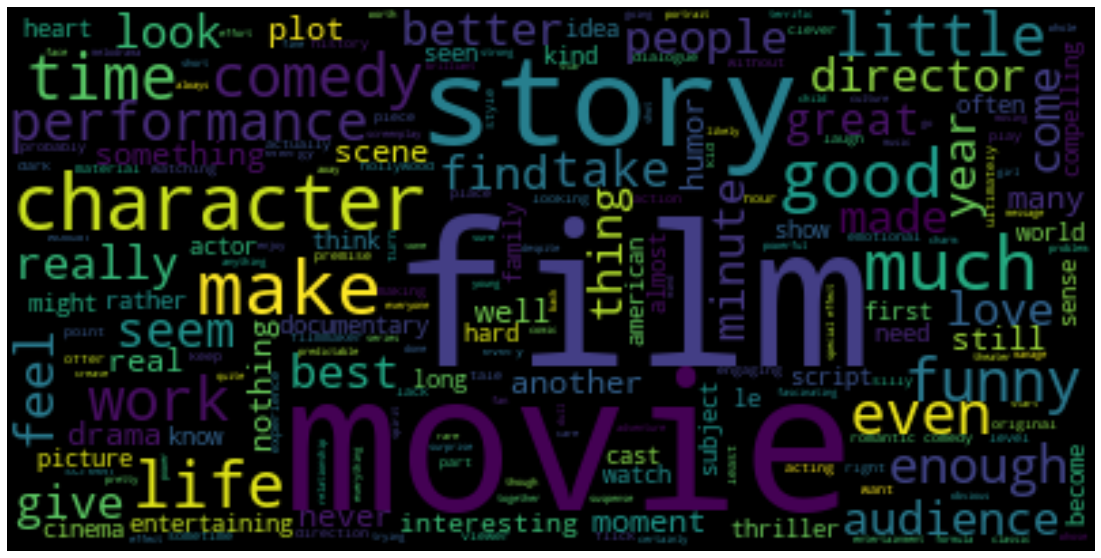

In [ ]:
from wordcloud import WordCloud
%matplotlib inline
import matplotlib.pyplot as plt
wordcloud = WordCloud(random_state=21).generate(CleanedText)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.show()